## Demo of NLP functionality
Here we describe some of the available tools to help you with nlp tasks.

### Annotations to POS / IOB Format

`AnnotationBuilder` provides various functionality for dealing with annotations

In [1]:
import os
os.chdir("/Users/vtshitoyan/dev/TRI/matstract")

from matstract.models.annotation_builder import AnnotationBuilder
builder = AnnotationBuilder()
annotations = builder.get_annotations(user=None)  # you can specify the user_key to get annotations of specific user

`annotations` is a list of `Annotation` objects containing all relevant annotaiton information. You can use the `to_iob()` method to get part of speech tags and IOB annotation used for named entity recognition

In [8]:
from pprint import pprint
iob, iob_str = annotations[0].to_iob(phrases=True)
pprint(iob_str)

('sputtering N B-SMT\n'
 'of I O\n'
 'ordered V B-DSC\n'
 'nickel NN B-MAT\n'
 '- HYPH I-MAT\n'
 'aluminium NN I-MAT\n'
 'alloys N B-DSC\n'
 'II CD O\n'
 '. . O\n'
 '\n'
 'preferential J O\n'
 'sputtering N B-SMT\n'
 'of I O\n'
 'AlNi J B-MAT\n'
 'single_crystals JJ_NNS B-DSC\n'
 'and CC O\n'
 'discussion NN O\n'
 '\n'
 'atom NN B-CMT\n'
 '- HYPH I-CMT\n'
 'probe NN I-CMT\n'
 'field NN I-CMT\n'
 '- HYPH I-CMT\n'
 'ion NN I-CMT\n'
 'microscopy NN I-CMT\n'
 'together RB O\n'
 'with IN O\n'
 'x-ray_photoelectron NN_NN B-CMT\n'
 'spectroscopy NN I-CMT\n'
 'and C O\n'
 'secondary_ion JJ_NN B-CMT\n'
 'mass_spectrometry NN_NN I-CMT\n'
 'have VBP O\n'
 'been VBN O\n'
 'applied VBN O\n'
 'to IN O\n'
 'the DT O\n'
 'microanalysis NN O\n'
 'of IN O\n'
 'fully RB O\n'
 'ordered V B-DSC\n'
 'AlNi J B-MAT\n'
 'single_crystals JJ_NNS B-DSC\n'
 'subjected VBN O\n'
 'to IN O\n'
 '<nUm> CD B-SMT\n'
 'keV NN I-SMT\n'
 'inert_gas JJ_NN I-SMT\n'
 'ion_bombardment NN_NN I-SMT\n'
 '. . O\n'
 '\n'
 'As IN O\n

You can also print the results as a plain string, which might be useful for portability

In [5]:
# pprint(.tokens)
annotations[0].phrase_tokens()

[[{'annotation': 'SMT', 'pos': 'N', 'text': 'sputtering'},
  {'annotation': None, 'pos': 'I', 'text': 'of'},
  {'annotation': 'DSC', 'pos': 'V', 'text': 'ordered'},
  {'annotation': 'MAT', 'pos': 'NN', 'text': 'nickel'},
  {'annotation': 'MAT', 'pos': 'HYPH', 'text': '-'},
  {'annotation': 'MAT', 'pos': 'NN', 'text': 'aluminium'},
  {'annotation': 'DSC', 'pos': 'N', 'text': 'alloys'},
  {'annotation': None, 'pos': 'CD', 'text': 'II'},
  {'annotation': None, 'pos': '.', 'text': '.'}],
 [{'annotation': None, 'pos': 'J', 'text': 'preferential'},
  {'annotation': 'SMT', 'pos': 'N', 'text': 'sputtering'},
  {'annotation': None, 'pos': 'I', 'text': 'of'},
  {'annotation': 'MAT', 'pos': 'J', 'text': 'AlNi'},
  {'annotation': 'DSC', 'pos': 'JJ_NNS', 'text': 'single_crystals'},
  {'annotation': None, 'pos': 'CC', 'text': 'and'},
  {'annotation': None, 'pos': 'NN', 'text': 'discussion'}],
 [{'annotation': 'CMT', 'pos': 'NN', 'text': 'atom'},
  {'annotation': 'CMT', 'pos': 'HYPH', 'text': '-'},
 

In [11]:
annotations[2].tokens

[[{'annotation': None,
   'end': 12,
   'id': ['token-0-9', 'token-10-12'],
   'pos': ['NN', 'IN'],
   'start': 0,
   'text': ['synthesis', 'of']},
  {'annotation': 'MAT',
   'end': 19,
   'id': 'token-13-19',
   'pos': 'NN',
   'start': 13,
   'text': ['CoLiO2']},
  {'annotation': 'APL',
   'end': 28,
   'id': 'token-20-28',
   'pos': 'NNS',
   'start': 20,
   'text': ['cathodes']},
  {'annotation': None,
   'end': 34,
   'id': ['token-29-31', 'token-32-34'],
   'pos': ['IN', 'DT'],
   'start': 29,
   'text': ['by', 'an']},
  {'annotation': 'CMT',
   'end': 53,
   'id': ['token-35-44', 'token-45-53'],
   'pos': ['NN', 'NN'],
   'start': 35,
   'text': ['oxidation', 'reaction']},
  {'annotation': None,
   'end': 75,
   'id': ['token-54-56', 'token-57-65', 'token-66-69', 'token-70-75'],
   'pos': ['IN', 'NN', 'CC', 'PRP$'],
   'start': 54,
   'text': ['in', 'solution', 'and', 'their']},
  {'annotation': 'PRO',
   'end': 102,
   'id': ['token-76-91', 'token-92-102'],
   'pos': ['JJ', 'NN

### Annotation Agreement Estimates

`AnnotationMetrics` provides a few useful tools for estimating inter-annotator agreement

In [3]:
from matstract.nlp.annotation_metrics import AnnotationMetrics
am = AnnotationMetrics()
all_labels = [label['value'] for label in AnnotationBuilder.LABELS]

{'db': 'matstract_db', 'user': 'webstract_read_only', 'pass': 'UjwrAnf94t9b59NZ', 'rest': 'matstract-shard-00-00-kve41.mongodb.net:27017,matstract-shard-00-01-kve41.mongodb.net:27017,matstract-shard-00-02-kve41.mongodb.net:27017/test?ssl=true&replicaSet=matstract-shard-0&authSource=admin'}


You can extract the [Cohen Kappa Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html) using `cohen_kappa` method

In [13]:
# you can specify a list of labels and annotations
kappa, kappaStd, existing_labels = am.cohen_kappa(labels=None, annotators=
                                                  {"anubhavmi6", 
                                                   "qimi6", 
                                                   "benmi6", 
                                                   "alirezami6",
                                                   "peiyuanmi6",
                                                   "michaelmi6",
                                                   "davidmi6",
                                                   "hillarymi6"})
print("Inter-annotator agreement is {:.2f} +/- {:.2f} %".format(kappa, kappaStd))

Inter-annotator agreement is 0.79 +/- 0.10 %


You can also get the similarity matrix across different labels

/Users/vtshitoyan/dev/TRI/matstract/matstract/nlp/utils.py:16: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/Users/vtshitoyan/anaconda3/envs/matstract-dev/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


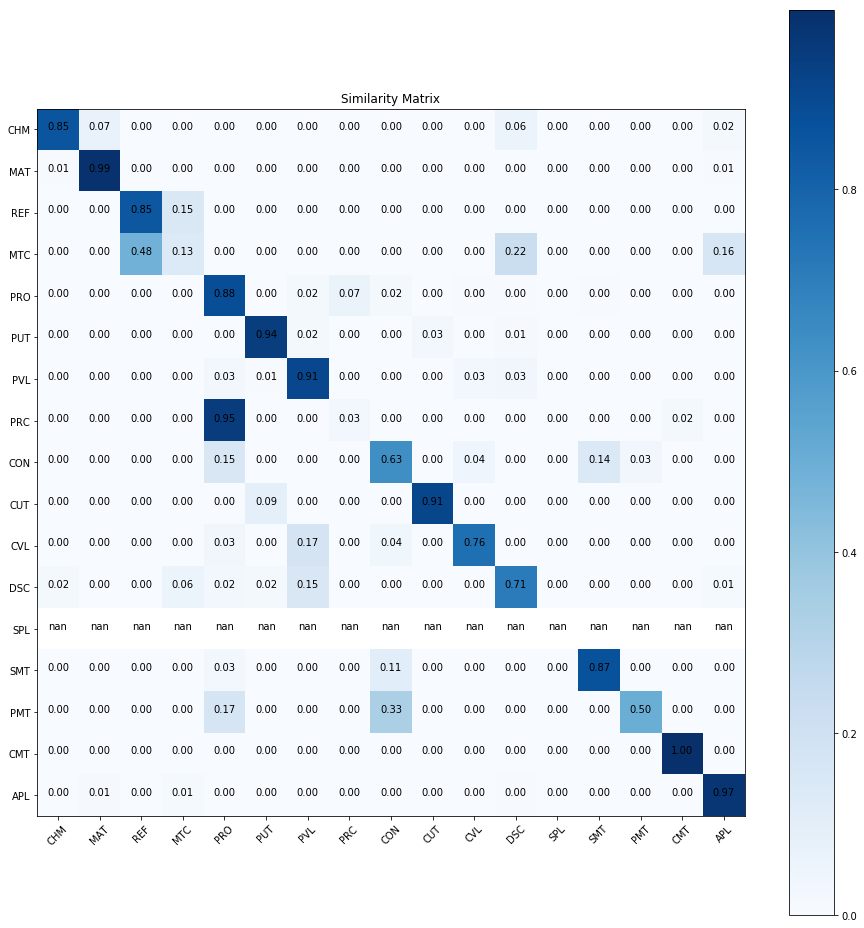

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matstract.nlp.utils import plot_matrix

similarity_matrix, labels = am.similarity_matrix(labels=all_labels, annotators=
                                                  {"anubhavmi6", 
                                                   "qimi6", 
                                                   "benmi6", 
                                                   "alirezami6",
                                                   "peiyuanmi6",
                                                   "michaelmi6",
                                                   "davidmi6",
                                                   "hillarymi6"})
plt.figure(figsize=(13,13))
plot_matrix(similarity_matrix, labels, normalize=True, title="Similarity Matrix")

A list of accuracies for different labels can be obtained

In [21]:
am.accuracies()

{'APL': 0.7397260273972602,
 'CHM': 0.690734055354994,
 'CMT': 0.8763250883392226,
 'CON': 0.6658823529411765,
 'CUT': 0.8023255813953488,
 'CVL': 0.7591836734693878,
 'DSC': 0.7477611940298508,
 'MAT': 0.8634222919937206,
 'MTC': 0.6909090909090909,
 'None': 0.9171066287622399,
 'PMT': 0.5,
 'PRC': 0.5220588235294118,
 'PRO': 0.7414781297134239,
 'PUT': 0.8154269972451791,
 'PVL': 0.6538952745849298,
 'REF': 0.508833922261484,
 'SMT': 0.8203266787658802,
 'SPL': 0.6944444444444444}